<a href="https://colab.research.google.com/github/kashir123/GBPUSD-final-project/blob/main/GBPUSD_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
os.chdir('/content/drive/MyDrive/project')

In [8]:
data = pd.read_csv("gbp_usd_data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-10-01,1.812908,1.813598,1.793400,1.799111,1.799111,0
1,2004-10-04,1.797591,1.797785,1.782086,1.784312,1.784312,0
2,2004-10-05,1.784312,1.787694,1.780912,1.782912,1.782912,0
3,2004-10-06,1.782785,1.788493,1.775095,1.779486,1.779486,0
4,2004-10-07,1.779486,1.784312,1.777493,1.782499,1.782499,0


In [9]:
data = data.drop(columns=['Volume','Adj Close'])

In [10]:
data.head()

,Date,Open,High,Low,Close
0,2004-10-01,1.812908,1.813598,1.793400,1.799111
1,2004-10-04,1.797591,1.797785,1.782086,1.784312
2,2004-10-05,1.784312,1.787694,1.780912,1.782912
3,2004-10-06,1.782785,1.788493,1.775095,1.779486
4,2004-10-07,1.779486,1.784312,1.777493,1.782499


In [11]:
data.describe()

,Open,High,Low,Close
count,5200.000000,5200.000000,5200.000000,5200.000000
mean,1.518296,1.523915,1.512300,1.518320
std,0.237287,0.237954,0.237076,0.237310
min,1.072846,1.083541,0.637389,1.072754
25%,1.303586,1.307950,1.299195,1.303607
50%,1.517888,1.523926,1.511259,1.517957
75%,1.643554,1.648404,1.636909,1.643372
max,2.108415,2.115820,2.098812,2.108192


In [12]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [13]:
data.shape

(5200, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5200 non-null   object 
 1   Open    5200 non-null   float64
 2   High    5200 non-null   float64
 3   Low     5200 non-null   float64
 4   Close   5200 non-null   float64
dtypes: float64(4), object(1)
memory usage: 203.2+ KB


In [15]:
data['Date'] = pd.to_datetime(data['Date'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5200 non-null   datetime64[ns]
 1   Open    5200 non-null   float64       
 2   High    5200 non-null   float64       
 3   Low     5200 non-null   float64       
 4   Close   5200 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 203.2 KB


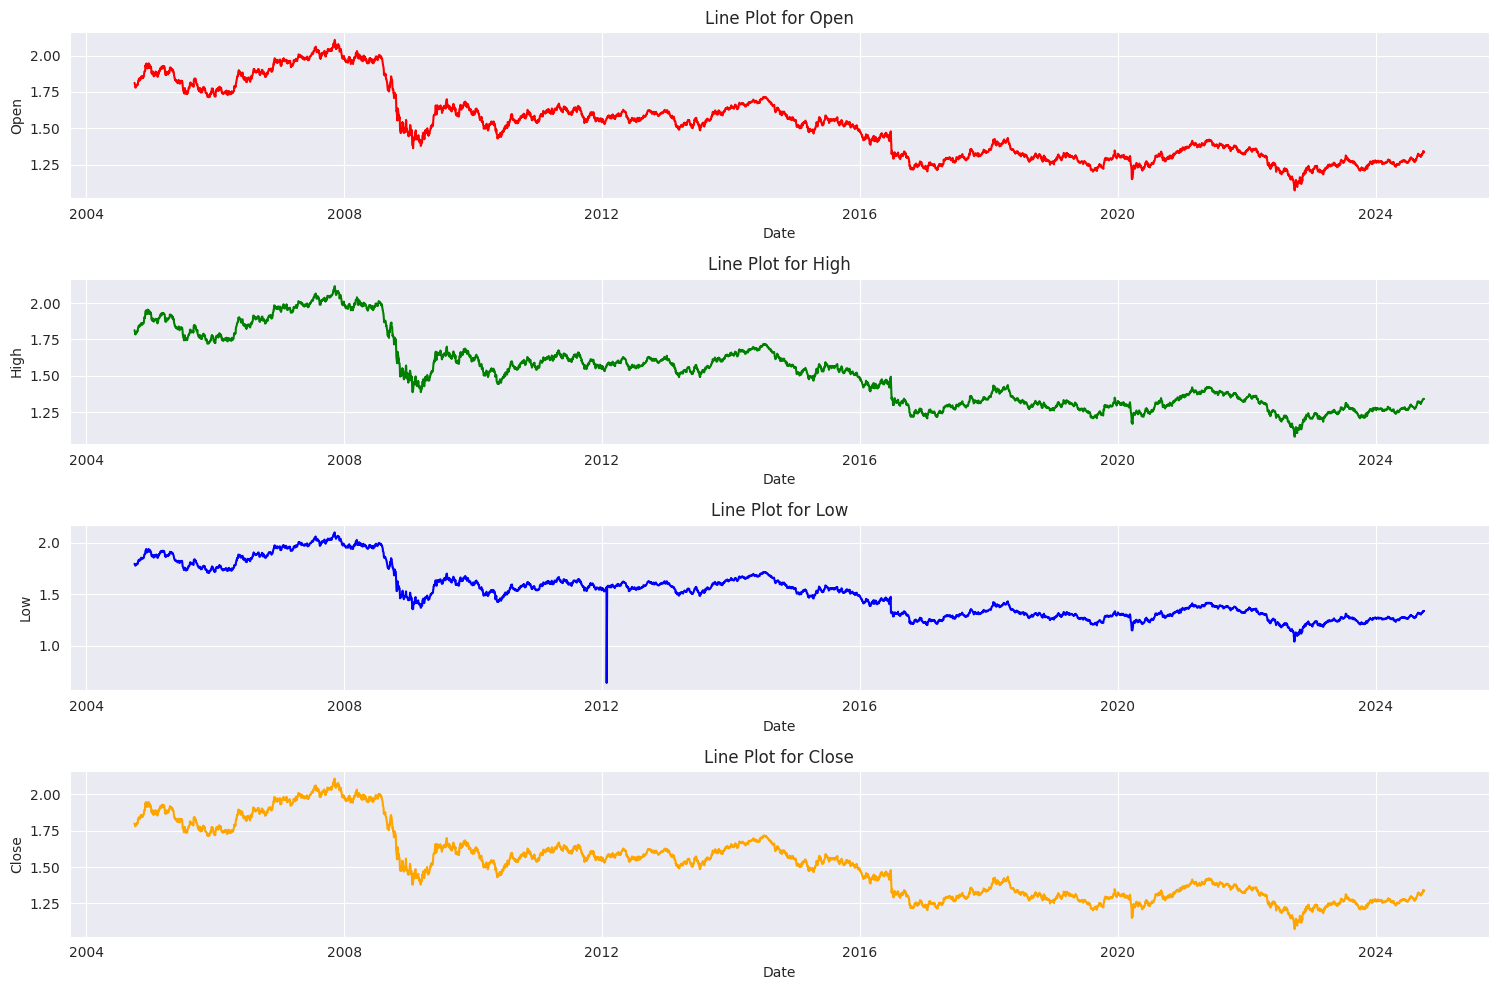

In [19]:
fig, axs = plt.subplots(4,1, figsize=(15,10))

col = ['Open', 'High', 'Low', 'Close']
colors = ['red','green','blue','orange']

for i,name in enumerate(col):
  sns.lineplot(data=data, x='Date', y=name, color=colors[i], ax=axs[i])
  axs[i].set_xlabel('Date')
  axs[i].set_ylabel(name)
  axs[i].set_title(f'Line Plot for {name}')
  sns.set_style('whitegrid')

plt.tight_layout()
plt.show()

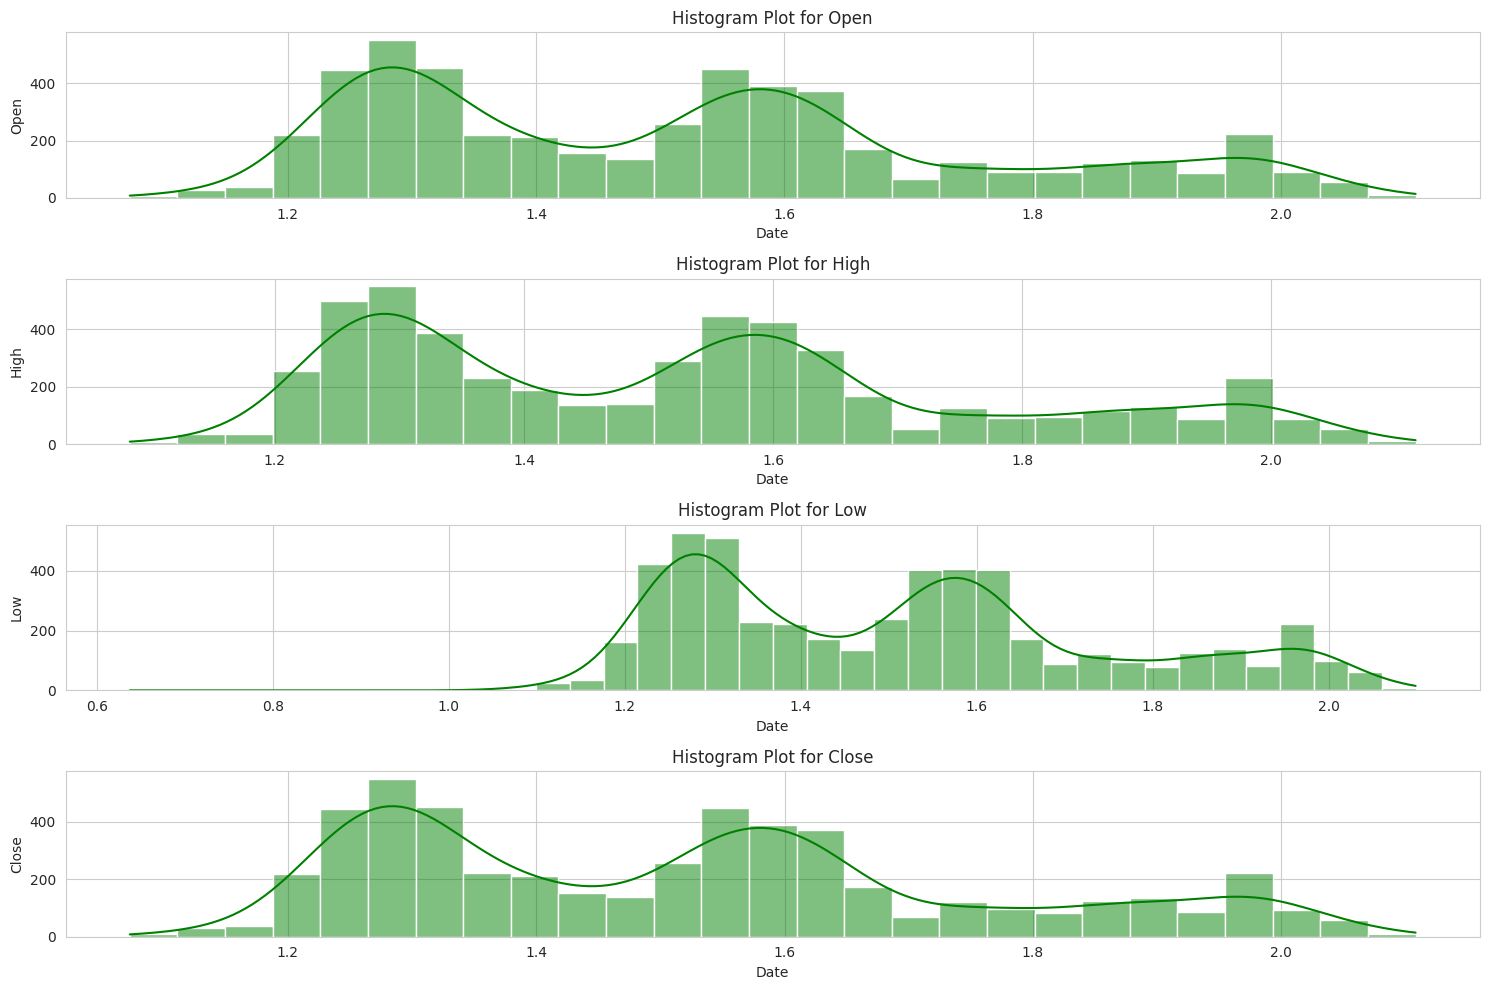

In [22]:
fig, axs = plt.subplots(4,1, figsize=(15,10))


for i,name in enumerate(col):
  sns.histplot(data=data[name],kde=True, color="green", ax=axs[i])
  axs[i].set_xlabel('Date')
  axs[i].set_ylabel(name)
  axs[i].set_title(f'Histogram Plot for {name}')

plt.tight_layout()
plt.show()